# Import data

In [1]:
!kaggle datasets download -d maajdl/yeh-concret-data
!unzip yeh-concret-data.zip
!pip install umap-learn

Dataset URL: https://www.kaggle.com/datasets/maajdl/yeh-concret-data
License(s): other
  0% 0.00/10.2k [00:00<?, ?B/s]
100% 10.2k/10.2k [00:00<00:00, 16.6MB/s]
Archive:  yeh-concret-data.zip
  inflating: Concrete_Data_Yeh.csv   
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 799.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 1.8 MB/s eta 0:00:00


**About Dataset**

Context

**Abstract:**
Concrete is the most important material in civil engineering.
The concrete compressive strength is a highly nonlinear function of age and ingredients.

**Content**
Concrete Compressive Strength Data Set
Data Set Information:
Number of instances 1030
Number of Attributes 9
Attribute breakdown 8 quantitative input variables, and 1 quantitative output variable
Missing Attribute Values None

**Attribute Information:**
Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

**Name** -- Data Type -- Measurement -- Description

**Cement** (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable

**Blast Furnace Slag** (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

**Fly Ash** (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable

**Water** (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable

**Superplasticizer** (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable

**Coarse Aggregate** (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable

**Fine Aggregate** (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable

**Age** -- quantitative -- Day (1~365) -- Input Variable

**Concrete compressive strength** -- quantitative -- MPa -- Output Variable

### Imports and global settings

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

import umap

from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS


import random
import time

std_figure_size = (8,5)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

fixed_random_state = random.seed(42)
n_parallel_jobs = -1

%config IPCompleter.use_jedi=False

### show data

In [3]:
df = pd.read_csv("/content/Concrete_Data_Yeh.csv")

df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


# EDA

## Any duplicate rows?

In [6]:
n_dup = len(df) - len(df.drop_duplicates())

print(f"Number of duplicate rows: {n_dup}")

Number of duplicate rows: 25


### Any missing values?

In [7]:
df.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

**Cleaning up column names (mainly for handling purposes)**

In [8]:
cols_cleaned = []

for col in df.columns:
    cols_cleaned.append(col.strip().lower())

df.columns = cols_cleaned

# sanity check
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csmpa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


**Quick overview over the individual distributions**

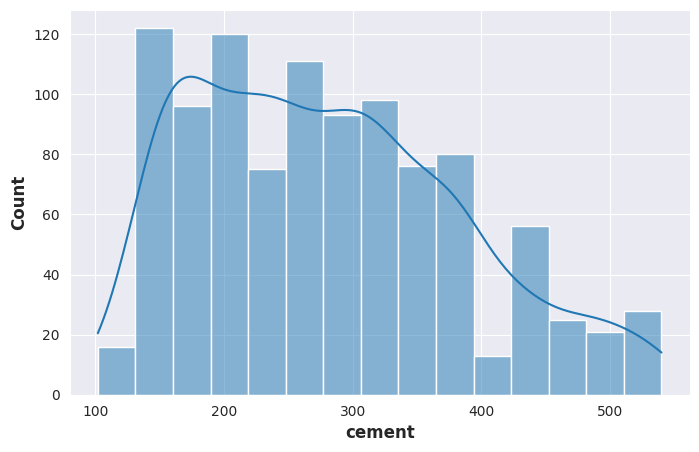

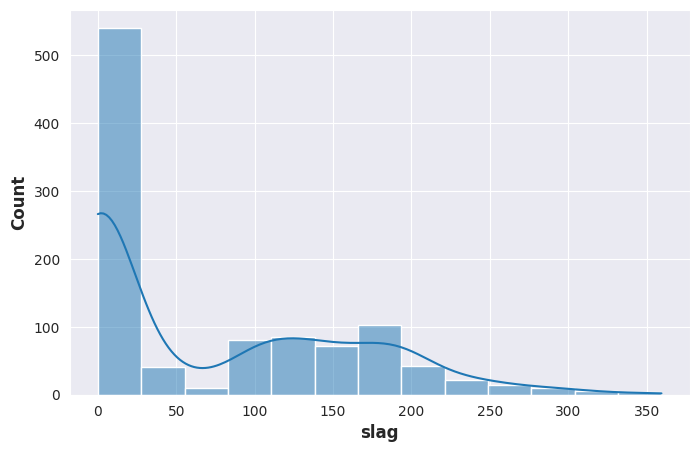

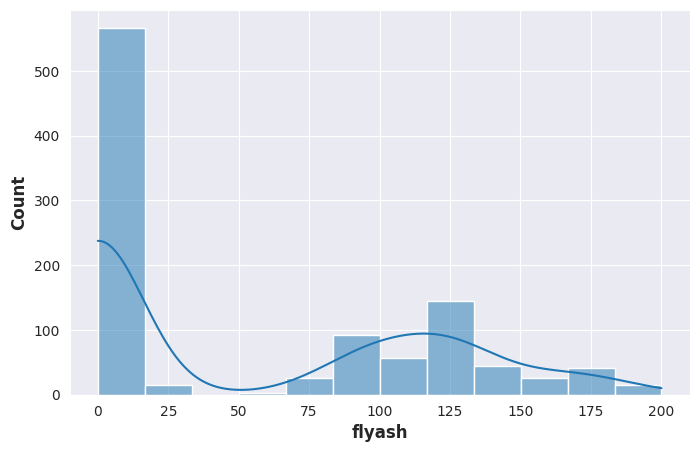

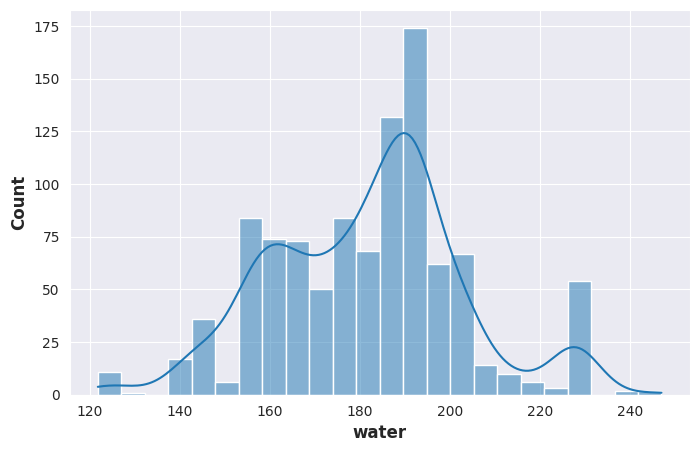

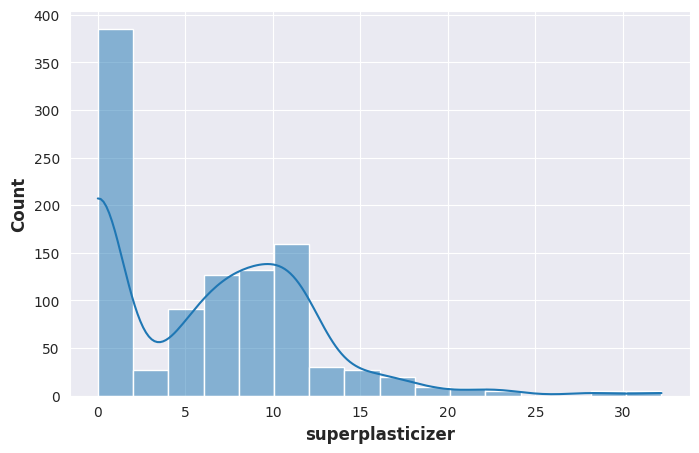

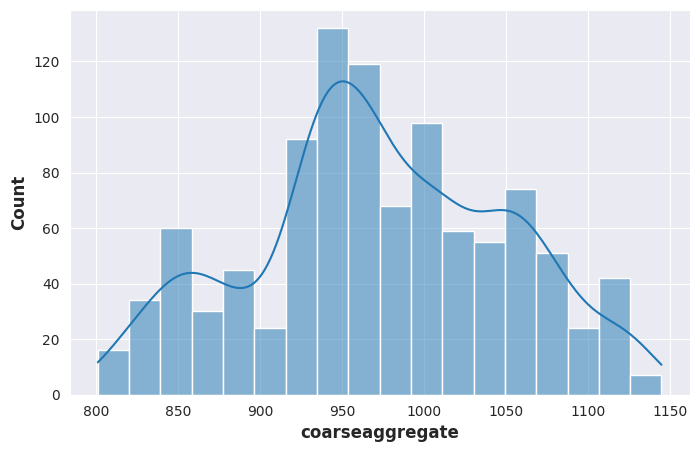

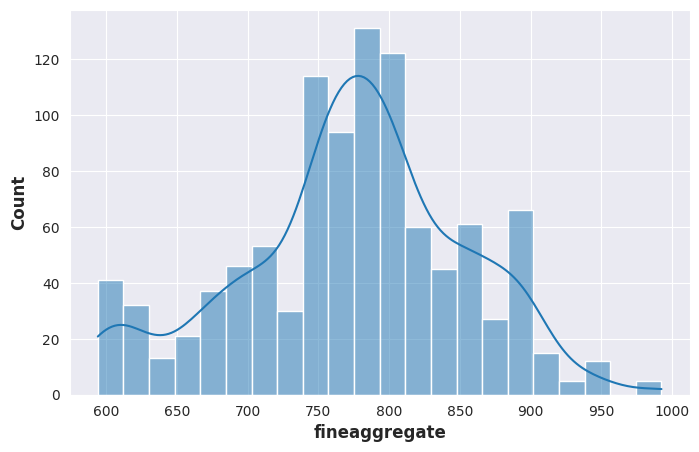

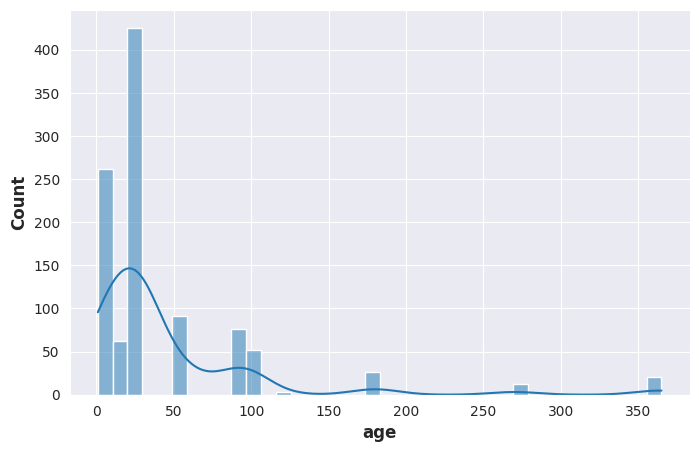

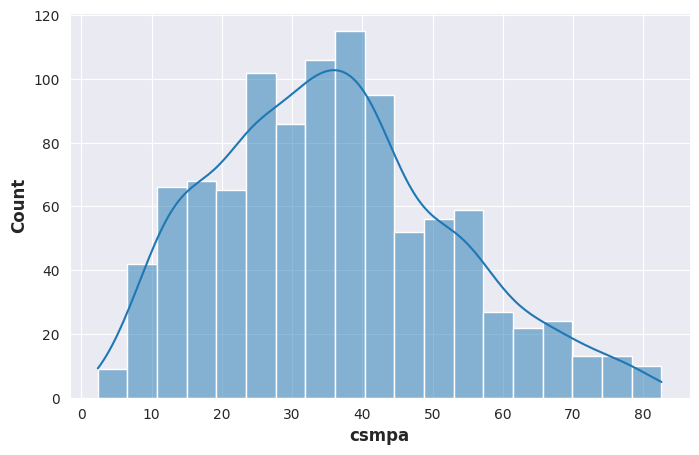

In [9]:
for col in df.columns:
    fig, axs = plt.subplots(figsize=std_figure_size)
    sns.histplot(data=df, x=col, kde=True, ax=axs)
    plt.show()

## Scaling and Standardizing

In [27]:
df_x=df.drop("csmpa", axis=1)
X = StandardScaler().fit_transform(df_x)
X

array([[ 2.47791487, -0.85688789, -0.84714393, ...,  0.86315424,
        -1.21767004, -0.27973311],
       [ 2.47791487, -0.85688789, -0.84714393, ...,  1.05616419,
        -1.21767004, -0.27973311],
       [ 0.49142531,  0.79552649, -0.84714393, ..., -0.52651741,
        -2.24091709,  3.55306569],
       ...,
       [-1.27008832,  0.75957923,  0.85063487, ..., -1.03606368,
         0.0801067 , -0.27973311],
       [-1.16860982,  1.30806485, -0.84714393, ...,  0.21464081,
         0.19116644, -0.27973311],
       [-0.19403325,  0.30849909,  0.3769452 , ..., -1.39506219,
        -0.15074782, -0.27973311]])

In [28]:
df_y=df["csmpa"]
Y = StandardScaler().fit_transform(df_y.values.reshape(-1, 1))
Y

array([[ 2.64540763],
       [ 1.56142148],
       [ 0.26662698],
       ...,
       [-0.72572939],
       [-0.18253855],
       [-0.20469738]])

In [29]:
X = PowerTransformer(standardize=False).fit_transform(X)
X

array([[ 1.87030022, -1.19188911, -1.13292847, ...,  0.86847762,
        -1.13632081, -0.36080699],
       [ 1.87030022, -1.19188911, -1.13292847, ...,  1.06382462,
        -1.13632081, -0.36080699],
       [ 0.45290714,  0.5977637 , -1.13292847, ..., -0.52438956,
        -2.01316939,  0.82186796],
       ...,
       [-1.52725532,  0.57668792,  0.64907213, ..., -1.02872855,
         0.08059268, -0.36080699],
       [-1.38903733,  0.86202011, -1.13292847, ...,  0.21502691,
         0.1938554 , -0.36080699],
       [-0.20106129,  0.27149152,  0.32877248, ..., -1.38265828,
        -0.14908302, -0.36080699]])

In [30]:
Y = PowerTransformer(standardize=False).fit_transform(Y)
Y

array([[ 2.1508214 ],
       [ 1.35156746],
       [ 0.25795351],
       ...,
       [-0.78728143],
       [-0.18686155],
       [-0.21010752]])

In [31]:
X = pd.DataFrame(X, columns=df_x.columns)

# sanity check
X.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,1.870300,-1.191889,-1.132928,-0.922752,-0.705237,0.868478,-1.136321,-0.360807
1,1.870300,-1.191889,-1.132928,-0.922752,-0.705237,1.063825,-1.136321,-0.360807
2,0.452907,0.597764,-1.132928,2.148703,-1.265444,-0.524390,-2.013169,0.821868
3,0.452907,0.597764,-1.132928,2.148703,-1.265444,-0.524390,-2.013169,0.885079
4,-0.896478,0.527588,-1.132928,0.486926,-1.265444,0.070570,0.675757,0.882513


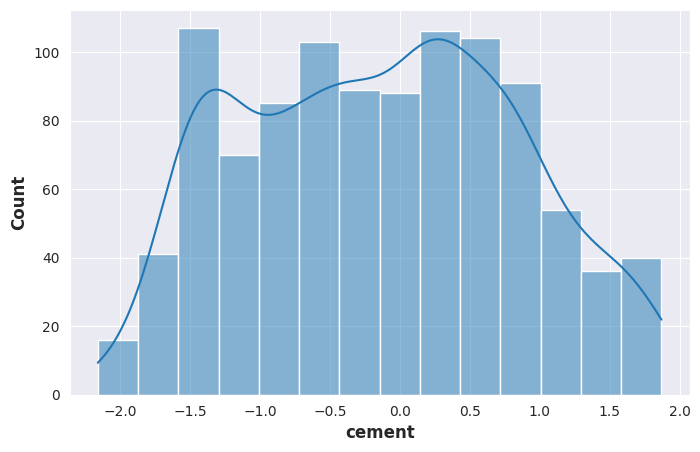

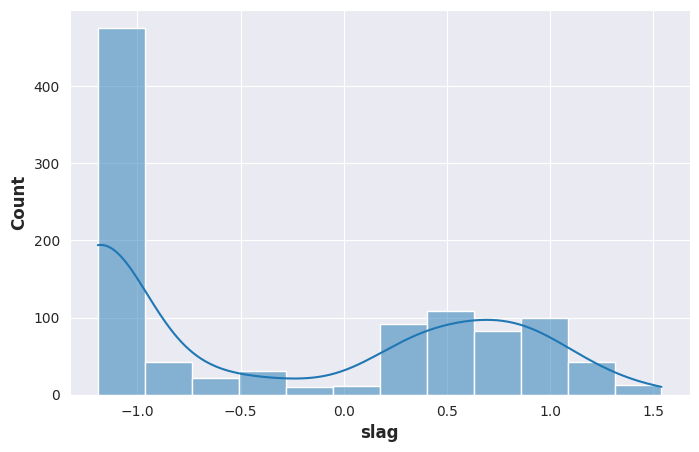

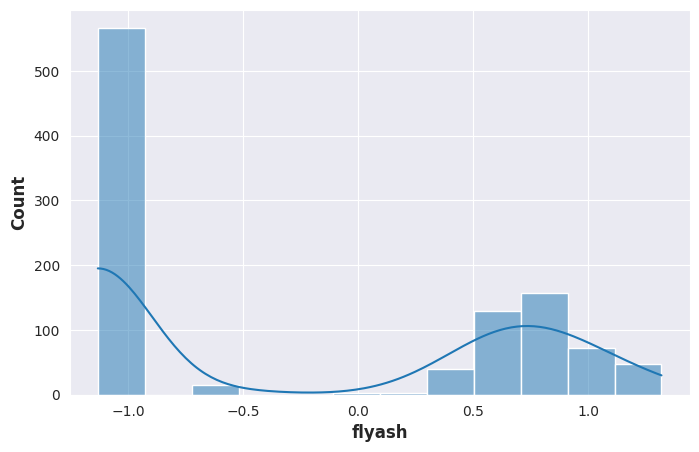

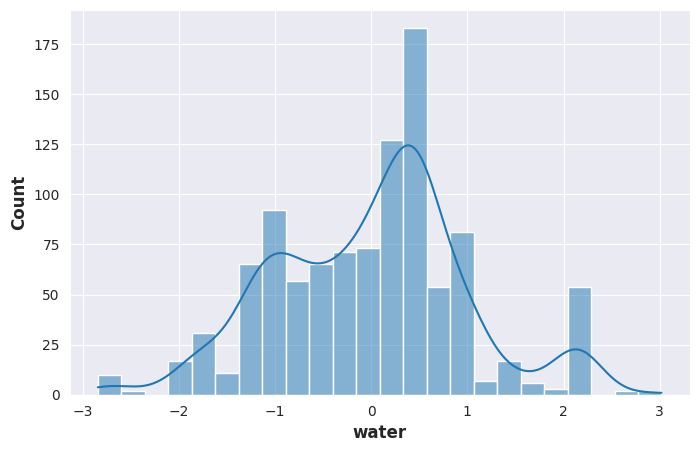

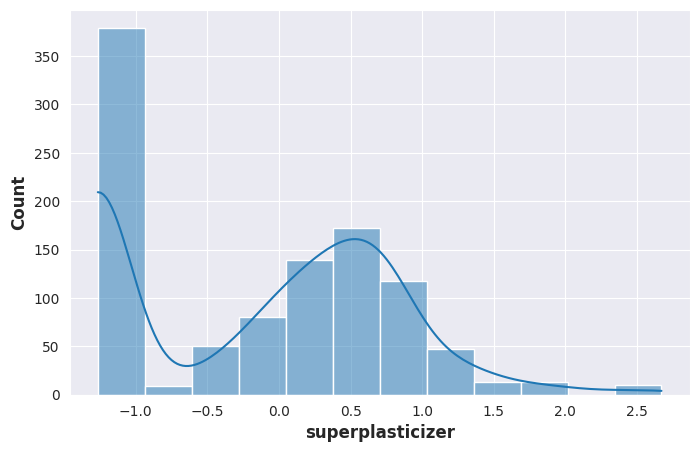

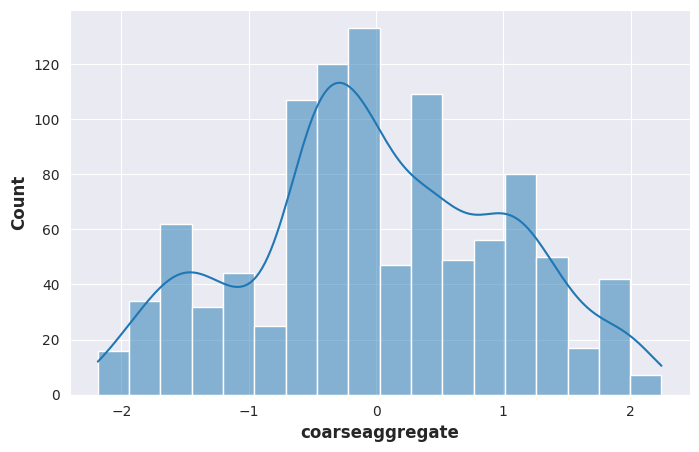

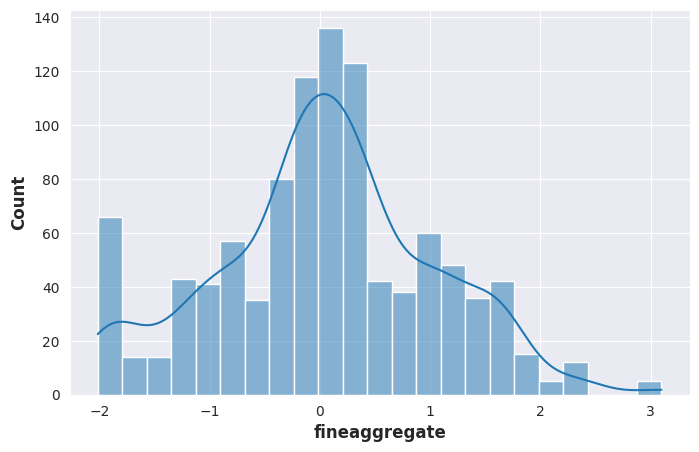

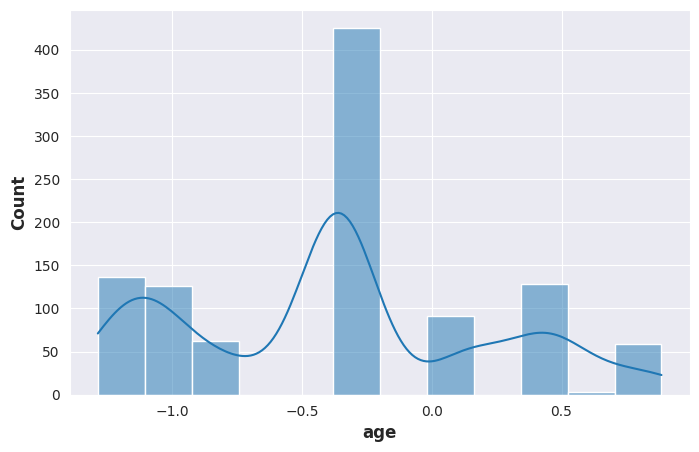

In [32]:
for col in X.columns:
    fig, axs = plt.subplots(figsize=std_figure_size)
    sns.histplot(data=X, x=col, kde=True, ax=axs)
    plt.show()

# Split dataset

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)

In [34]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [35]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(721, 8) (154, 8) (155, 8) (721, 1) (154, 1) (155, 1)


### Setting up the architecture

In [36]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
#  sequentially (layer by layer)
#  ‘Dense’ refers to a fully-connected layer
model = Sequential([
    Dense(128, activation='relu', input_shape=(8,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [37]:
# ‘sgd’ refers to stochastic gradient descent
# The loss function for outputs that take the values 1 or 0 is called binary cross entropy.
# we want to track accuracy on top of the loss function
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

In [38]:
# Entrenar el modelo con validation_data
history = model.fit(X_train, Y_train, epochs=150, batch_size=32, validation_data=(X_val, Y_val))

Epoch 1/150
23/23 [==============================] - 1s 12ms/step - loss: 1.1326 - mean_absolute_error: 0.8561 - val_loss: 1.0090 - val_mean_absolute_error: 0.8133
Epoch 2/150
23/23 [==============================] - 0s 5ms/step - loss: 0.8049 - mean_absolute_error: 0.7201 - val_loss: 0.8261 - val_mean_absolute_error: 0.7378
Epoch 3/150
23/23 [==============================] - 0s 4ms/step - loss: 0.7078 - mean_absolute_error: 0.6638 - val_loss: 0.7691 - val_mean_absolute_error: 0.6994
Epoch 4/150
23/23 [==============================] - 0s 4ms/step - loss: 0.6691 - mean_absolute_error: 0.6365 - val_loss: 0.7351 - val_mean_absolute_error: 0.6659
Epoch 5/150
23/23 [==============================] - 0s 5ms/step - loss: 0.6571 - mean_absolute_error: 0.6273 - val_loss: 0.7187 - val_mean_absolute_error: 0.6487
Epoch 6/150
23/23 [==============================] - 0s 4ms/step - loss: 0.6477 - mean_absolute_error: 0.6184 - val_loss: 0.7094 - val_mean_absolute_error: 0.6384
Epoch 7/150
23/23 [==

# Validación del modelo

5/5 [==============================] - 0s 3ms/step
Mean Squared Error (MSE): 0.7015922268989736
Mean Absolute Error (MAE): 0.615467444909205
R-squared (R2): 0.26381025737175523


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


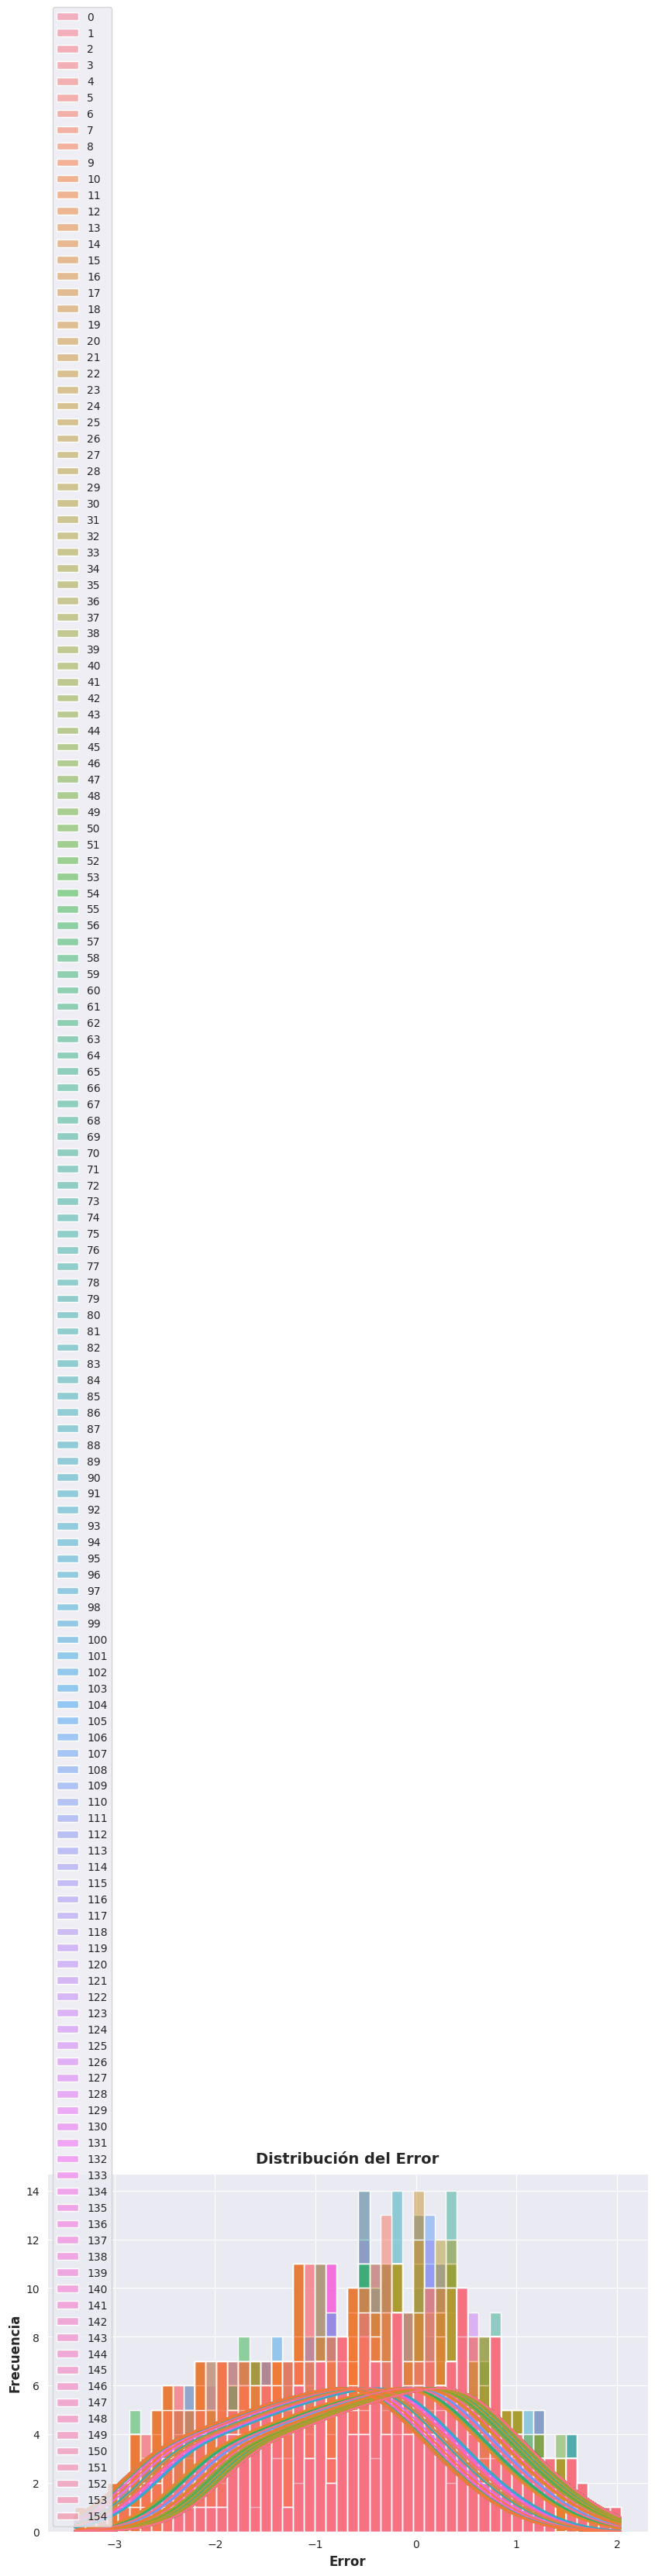

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = model.predict(X_test)

# Calcular el error
errors = Y_test - y_pred.flatten()

# Calcular métricas
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

# Mostrar las métricas
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

# Graficar la distribución del error
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, color='blue')
plt.title("Distribución del Error")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'histograma de las diferencias')

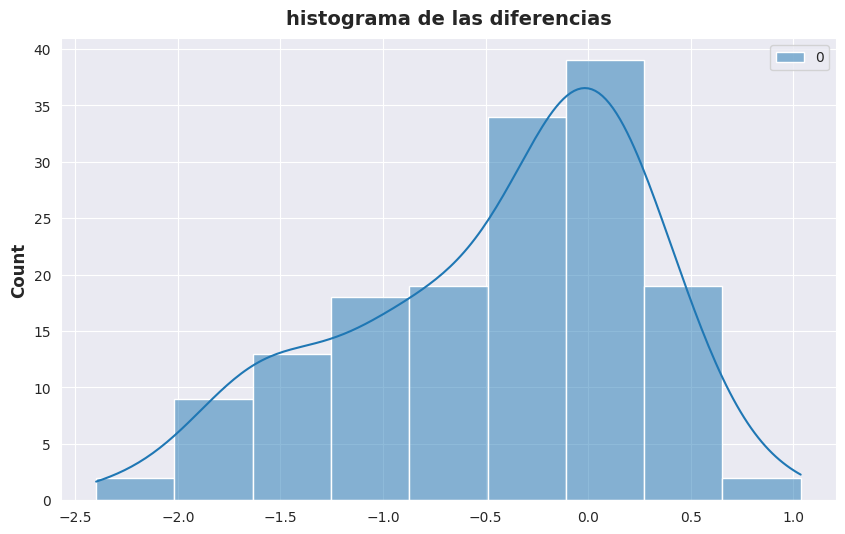

In [41]:
# Evaluando el modelo con un histograma que grafique la diferencia entre y_test y las predicciones del modelo
sns.histplot(Y_test-y_pred, kde=True)
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("histograma de las diferencias")

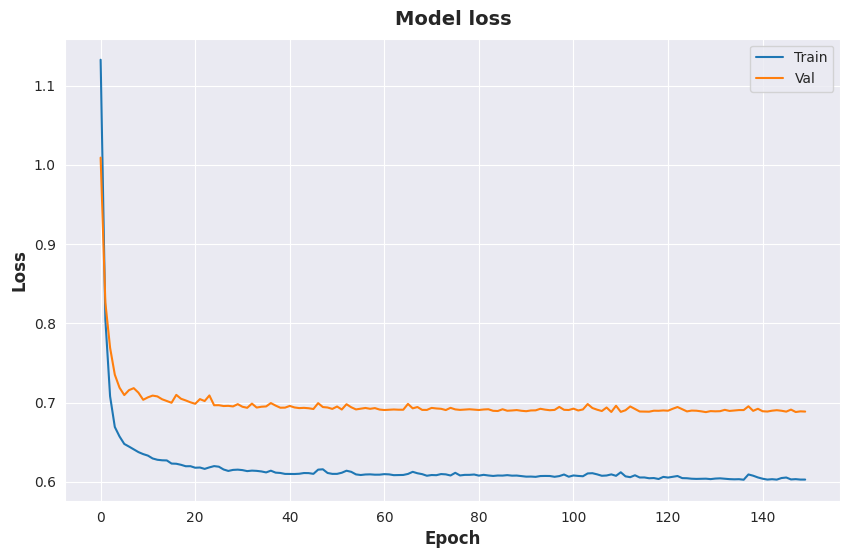

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

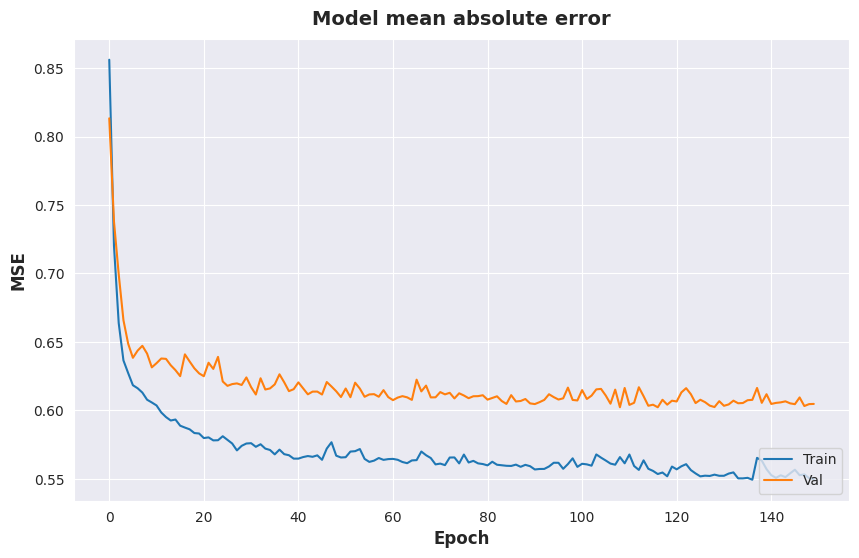

In [43]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Model mean absolute error')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])